# Introduction
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we can build a model that can predict wether or nor a borrower will pay back their loan

The "loan_status" column contains our label.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)
pd.set_option('display.max_colwidth',None)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


### Reading data

In [2]:
data0=pd.read_csv('lending_club_loan_two.csv')

In [3]:
data0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
info=pd.read_csv("lending_club_info.csv")

In [5]:
info

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

## Target column

In [7]:
data1=data0.copy()

In [8]:
data1.loan_status.head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

### Encoding target column

In [9]:
data1.loan_status=pd.get_dummies(data1.loan_status,drop_first=True)

In [10]:
data1.loan_status.head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: uint8

## Correlations

In [11]:
data1.corr().loan_status.sort_values()[:-1]

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_status, dtype: float64

<AxesSubplot:>

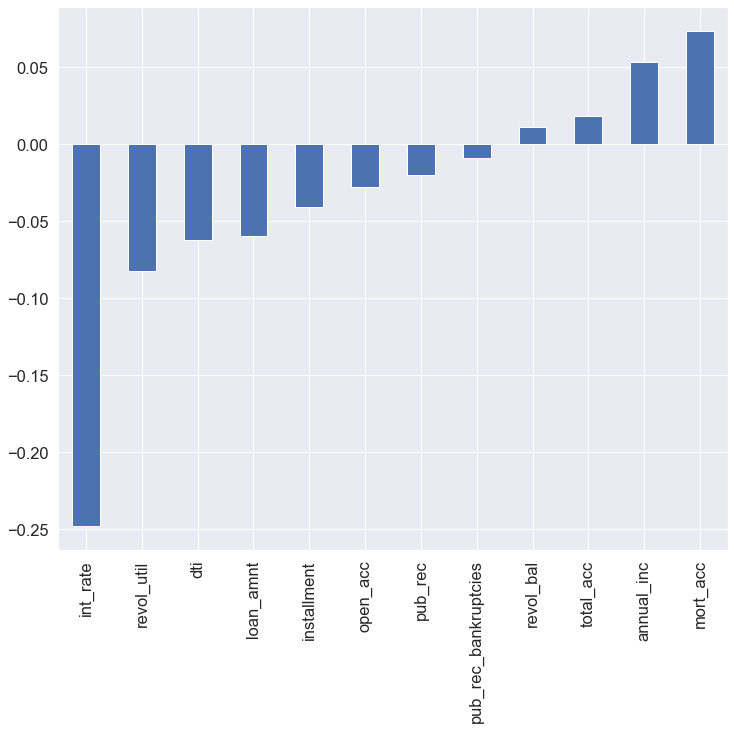

In [12]:
plt.figure(figsize=(12,10))
data1.corr().loan_status.sort_values()[:-1].plot(kind='bar')

In [13]:
correl=pd.DataFrame(data1.corr().loan_status.sort_values()[:-1]).reset_index()

In [14]:
correl

,index,loan_status
0,int_rate,-0.247758
1,revol_util,-0.082373
2,dti,-0.062413
3,loan_amnt,-0.059836
4,installment,-0.041082
5,open_acc,-0.028012
6,pub_rec,-0.019933
7,pub_rec_bankruptcies,-0.009383
8,revol_bal,0.010892
9,total_acc,0.017893


<AxesSubplot:xlabel='loan_status', ylabel='index'>

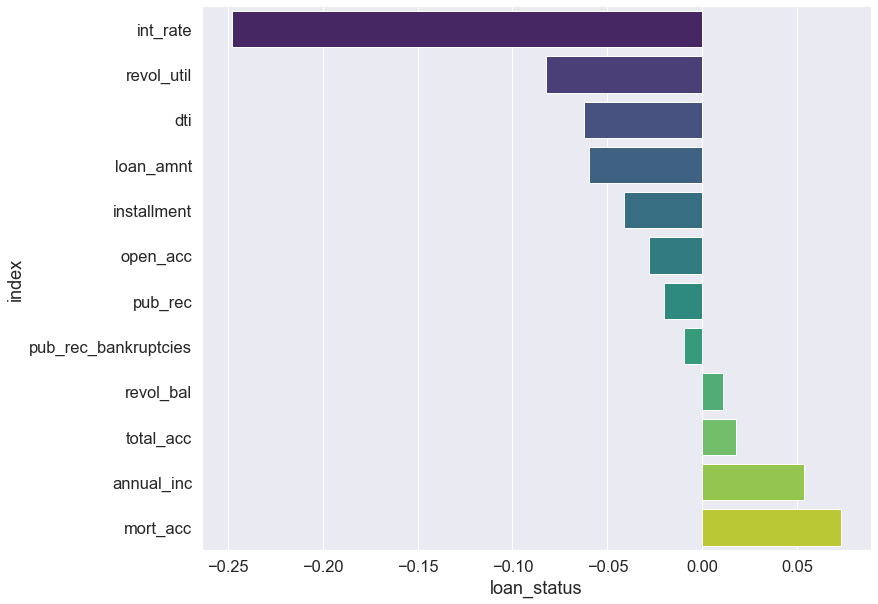

In [15]:
plt.figure(figsize=(12,10))
sns.barplot(y='index',x='loan_status',data=correl,palette='viridis')

**int_rate is the most negatively correlated with label at ~-0.25**

In [16]:
info[info.LoanStatNew=='int_rate'].Description

2    Interest Rate on the loan
Name: Description, dtype: object

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

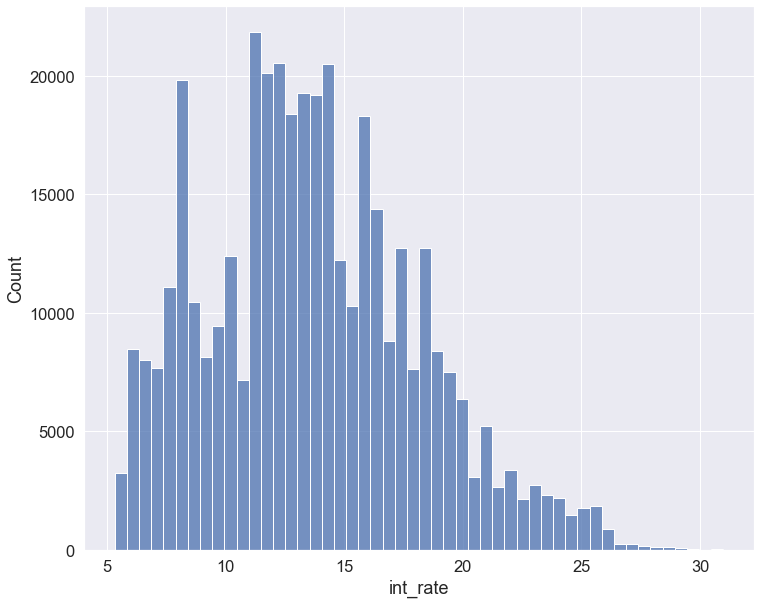

In [17]:
plt.figure(figsize=(12,10))
sns.histplot(data1.int_rate,bins=50)

**Maybe because lower interest rates are offered for those who have fully paid the loans**

## Collinearity

<AxesSubplot:>

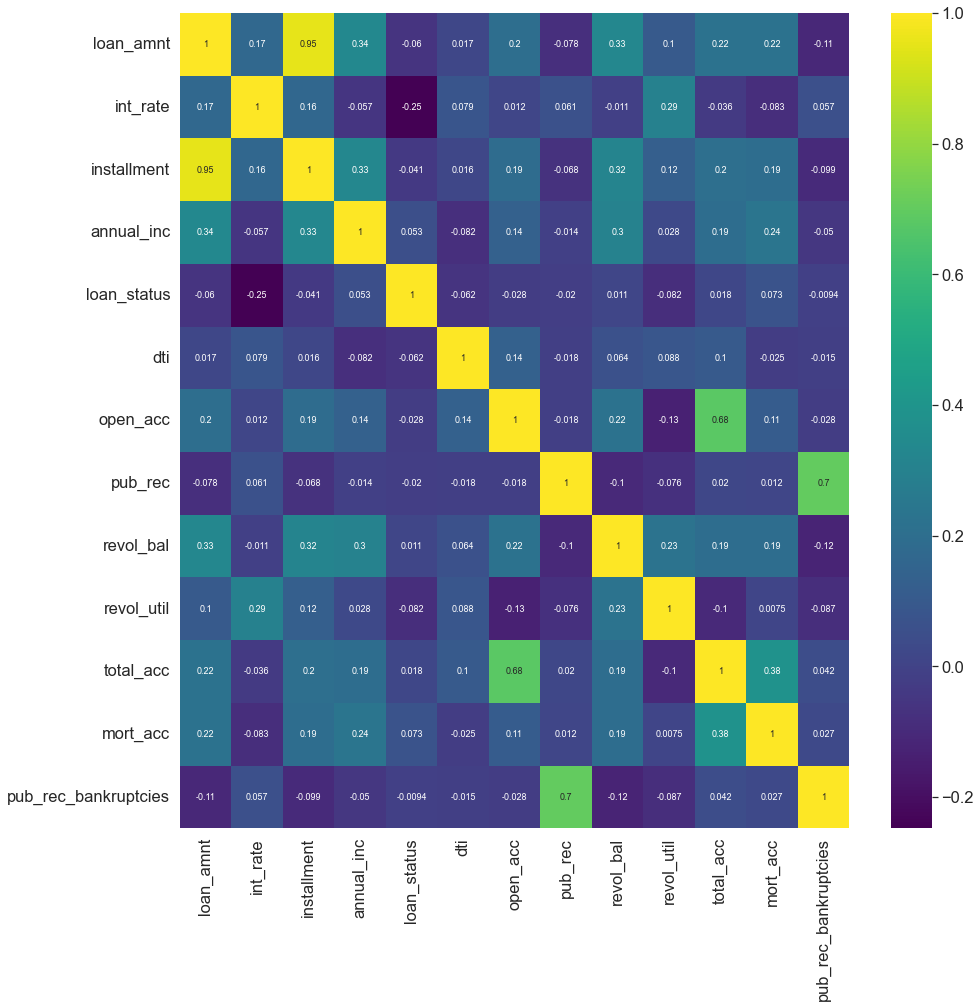

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),cmap='viridis',annot=True,annot_kws={'size':9})

### installment and loan_amnt is highly correlated at 0.95

In [19]:
info[info.LoanStatNew=='installment'].Description

3    The monthly payment owed by the borrower if the loan originates.
Name: Description, dtype: object

<AxesSubplot:xlabel='installment', ylabel='Count'>

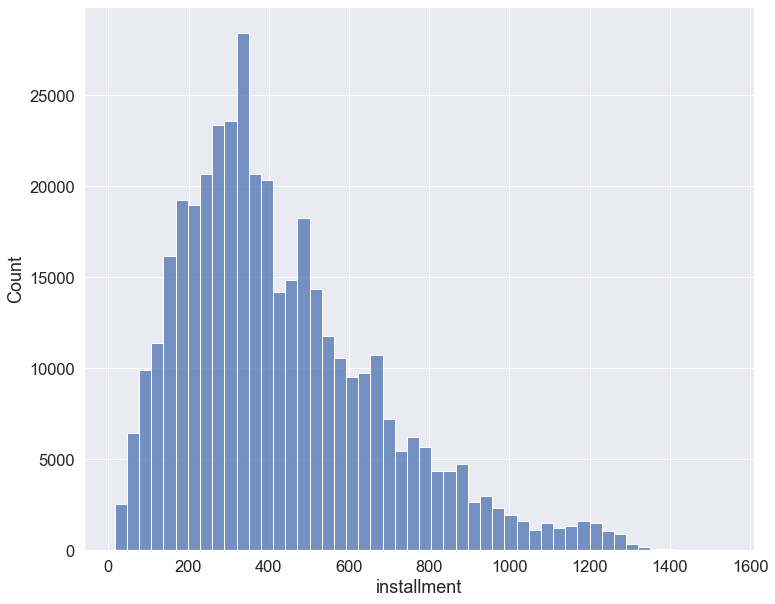

In [20]:
plt.figure(figsize=(12,10))
sns.histplot(data1.installment,bins=50)

In [21]:
data1.installment.describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

In [22]:
info[info.LoanStatNew=='loan_amnt'].Description

0    The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
Name: Description, dtype: object

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

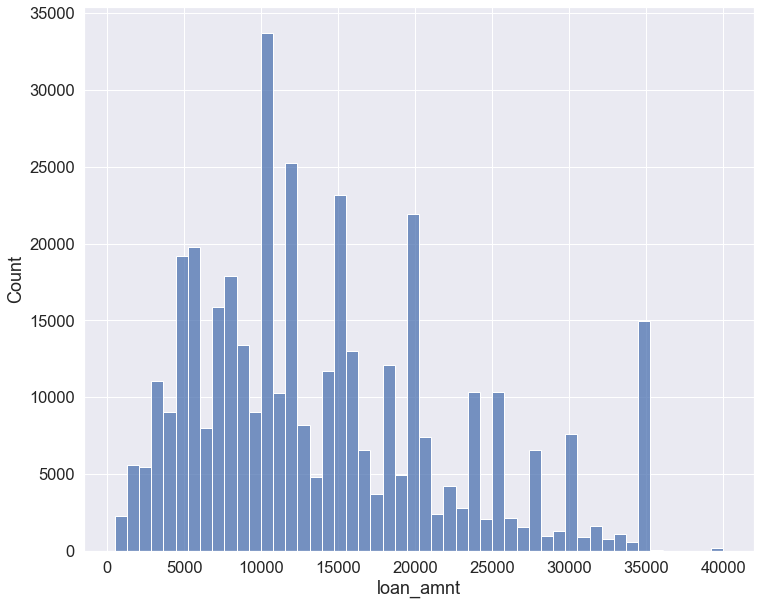

In [23]:
plt.figure(figsize=(12,10))
sns.histplot(data1.loan_amnt,bins=50)

In [24]:
data1.loan_amnt.describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

**installment is directly correlated to the loan_amnt as it is usually a percentage of loan amount**

### pub_rec and pub_rec_bankruptcies are correlated at 0.7

In [25]:
info[info.LoanStatNew=='pub_rec'].Description

20    Number of derogatory public records
Name: Description, dtype: object

<AxesSubplot:xlabel='pub_rec', ylabel='Count'>

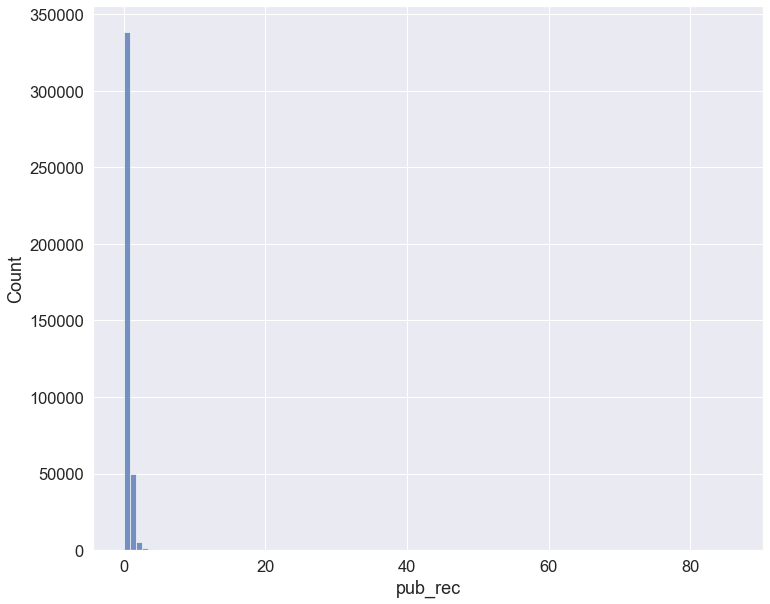

In [26]:
plt.figure(figsize=(12,10))
sns.histplot(data1.pub_rec,bins=100)

<AxesSubplot:xlabel='pub_rec', ylabel='Count'>

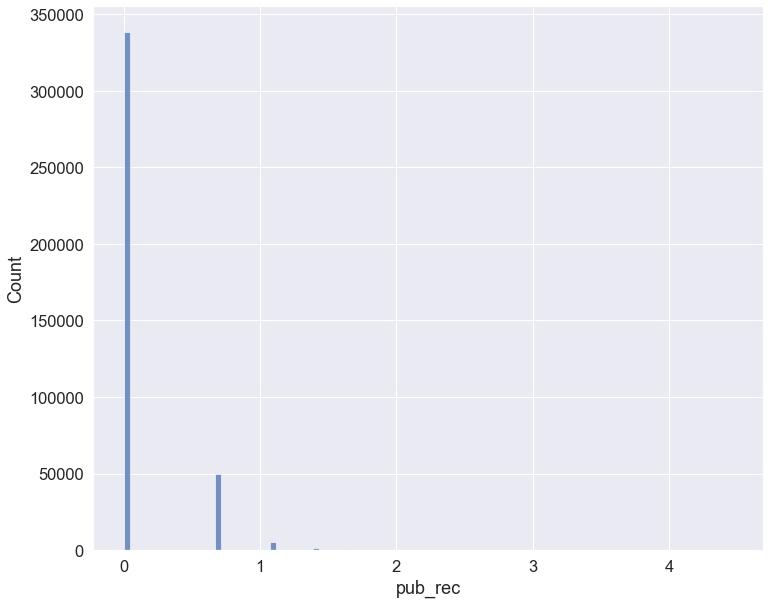

In [27]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.pub_rec),bins=100)

In [28]:
data1.pub_rec.describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [29]:
info[info.LoanStatNew=='pub_rec_bankruptcies'].Description

27    Number of public record bankruptcies
Name: Description, dtype: object

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

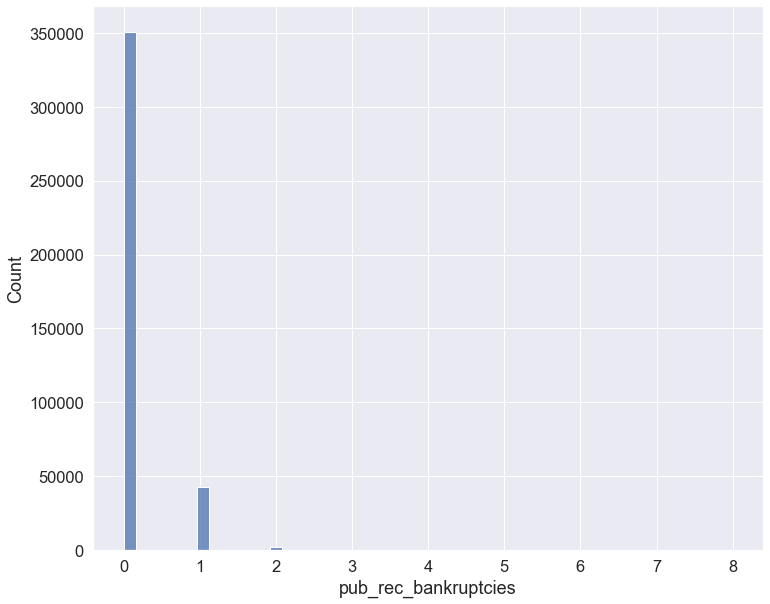

In [30]:
plt.figure(figsize=(12,10))
sns.histplot(data1.pub_rec_bankruptcies,bins=50)

In [31]:
data1.pub_rec_bankruptcies.describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

**Both features are indicative of past records of consumer. Hence correlated**

### open_acc and total_acc are correlated at 0.68

In [32]:
info[info.LoanStatNew=='open_acc'].Description

19    The number of open credit lines in the borrower's credit file.
Name: Description, dtype: object

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

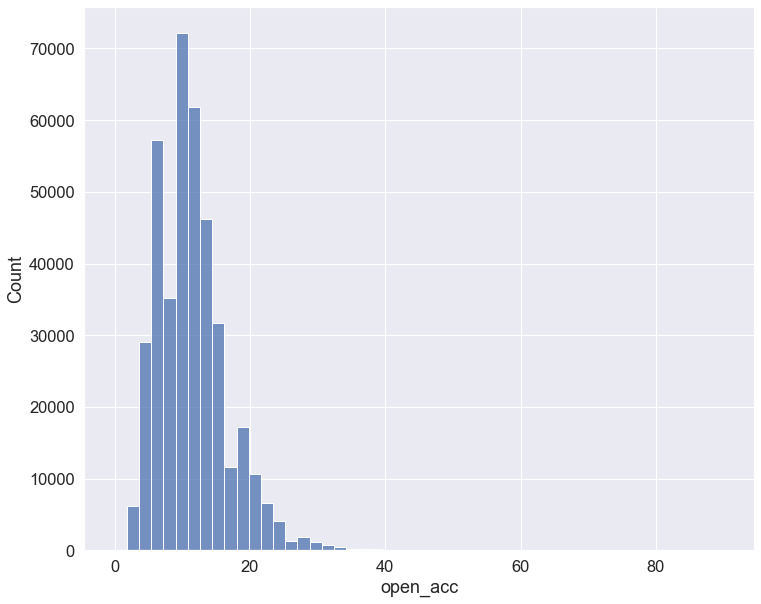

In [33]:
plt.figure(figsize=(12,10))
sns.histplot(data1.open_acc,bins=50)

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

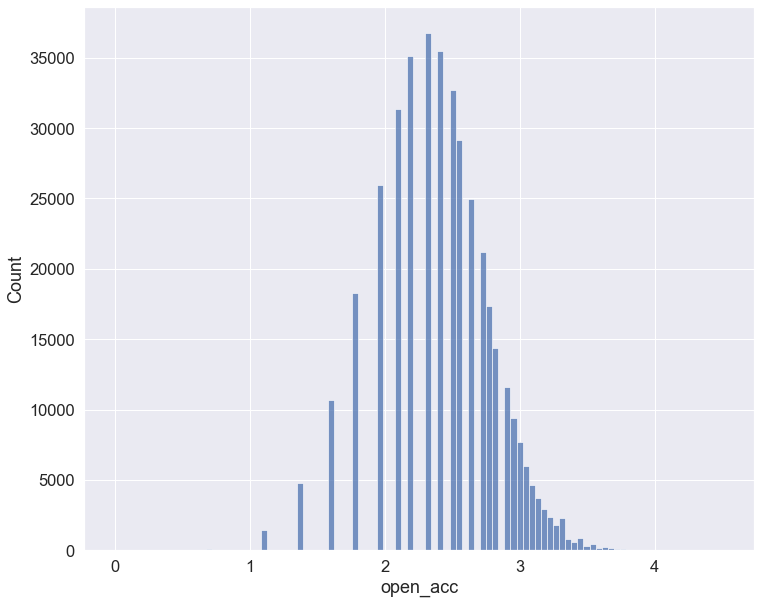

In [34]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.open_acc),bins=100)

In [35]:
data1.open_acc.describe()

count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

In [36]:
info[info.LoanStatNew=='total_acc'].Description

23    The total number of credit lines currently in the borrower's credit file
Name: Description, dtype: object

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

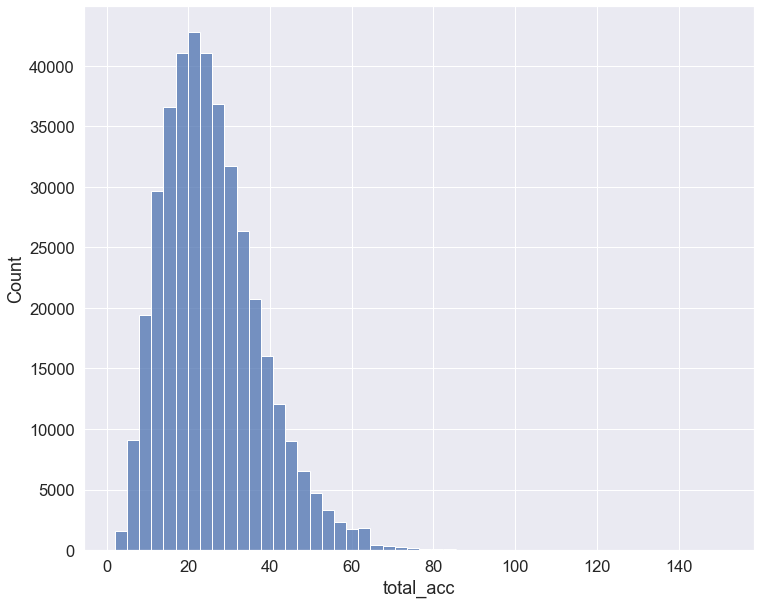

In [37]:
plt.figure(figsize=(12,10))
sns.histplot(data1.total_acc,bins=50)

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

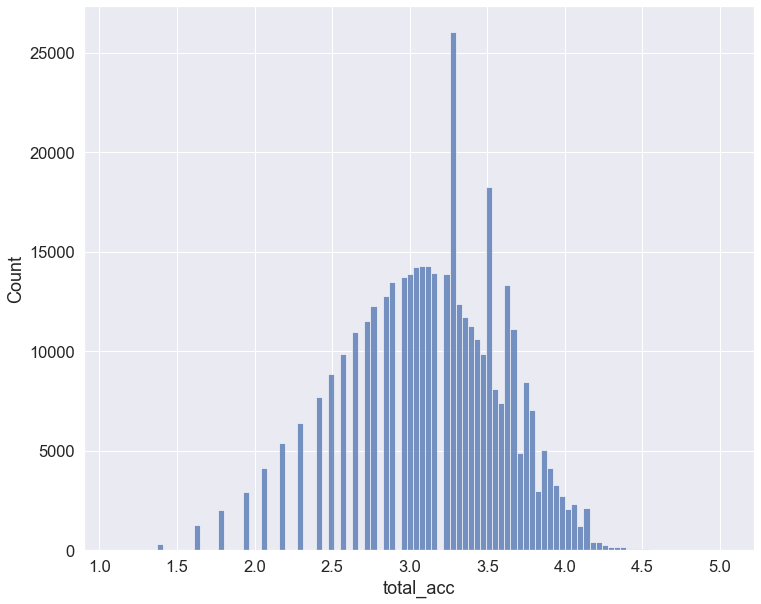

In [38]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.total_acc),bins=100)

In [39]:
data1.total_acc.describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

**One feature is a subset of another. Hence correlated**

## Other numerical features

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  uint8  
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [41]:
data1.select_dtypes('float').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   dti                   396030 non-null  float64
 5   open_acc              396030 non-null  float64
 6   pub_rec               396030 non-null  float64
 7   revol_bal             396030 non-null  float64
 8   revol_util            395754 non-null  float64
 9   total_acc             396030 non-null  float64
 10  mort_acc              358235 non-null  float64
 11  pub_rec_bankruptcies  395495 non-null  float64
dtypes: float64(12)
memory usage: 36.3 MB


### annual_inc

In [42]:
info[info.LoanStatNew=='annual_inc'].Description

9    The self-reported annual income provided by the borrower during registration.
Name: Description, dtype: object

In [43]:
data1.annual_inc.describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

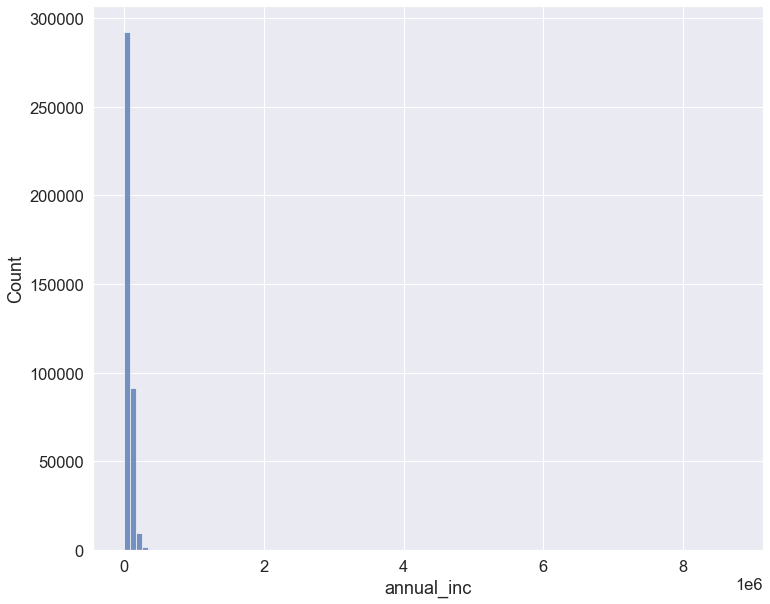

In [44]:
plt.figure(figsize=(12,10))
sns.histplot(data1.annual_inc,bins=100)

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

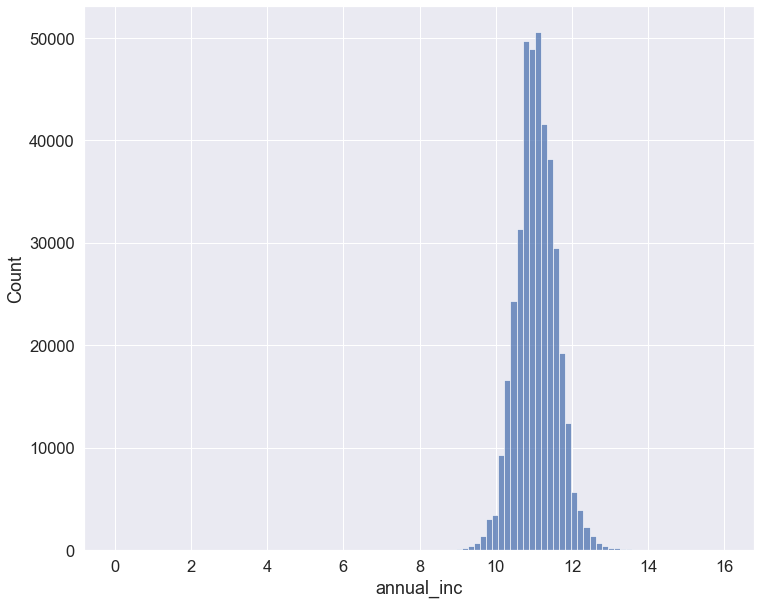

In [45]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.annual_inc),bins=100)

### dti

In [46]:
info[info.LoanStatNew=='dti'].Description

17    A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
Name: Description, dtype: object

In [47]:
data1.dti.describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

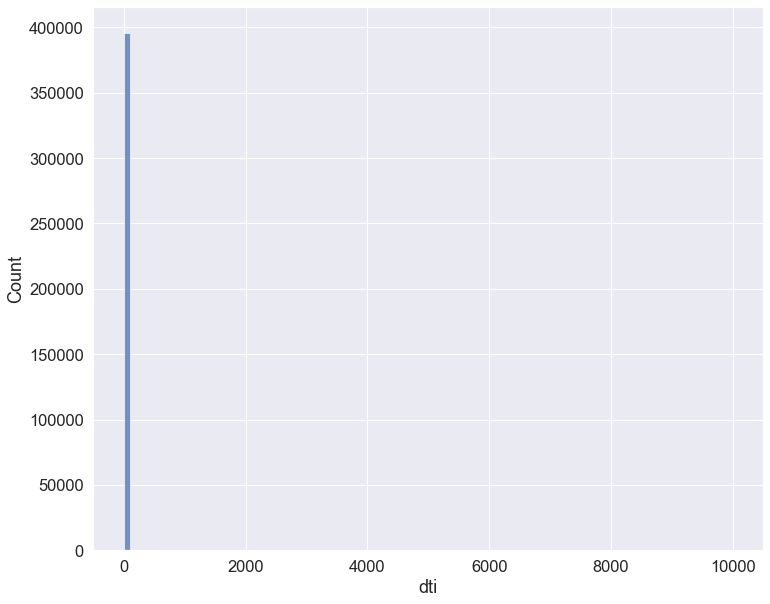

In [48]:
plt.figure(figsize=(12,10))
sns.histplot(data1.dti,bins=100)

<AxesSubplot:xlabel='dti', ylabel='Count'>

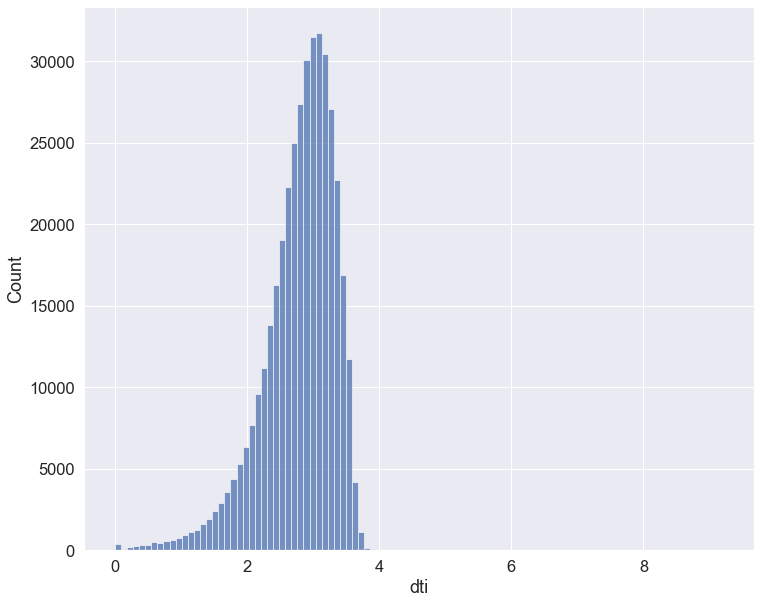

In [49]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.dti),bins=100)

### revol_bal

In [50]:
info[info.LoanStatNew=='revol_bal'].Description

21    Total credit revolving balance
Name: Description, dtype: object

In [51]:
data1.revol_bal.describe()

count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

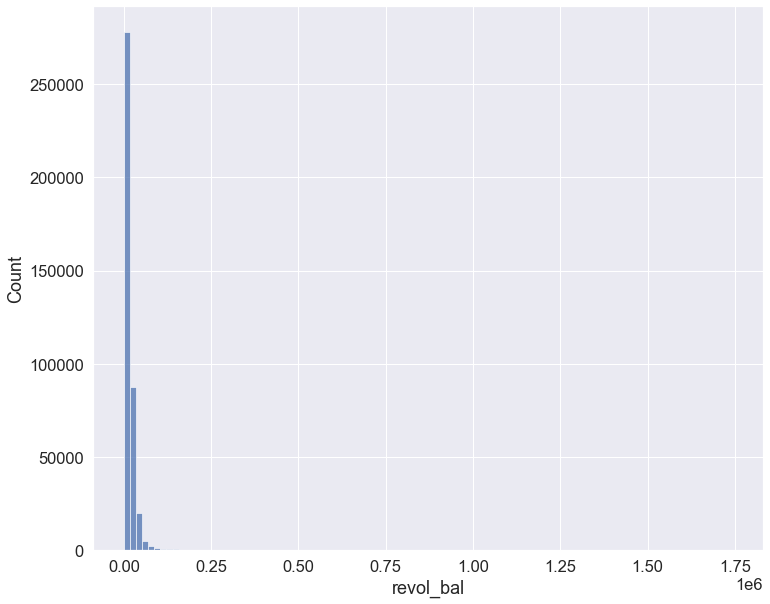

In [52]:
plt.figure(figsize=(12,10))
sns.histplot(data1.revol_bal,bins=100)

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

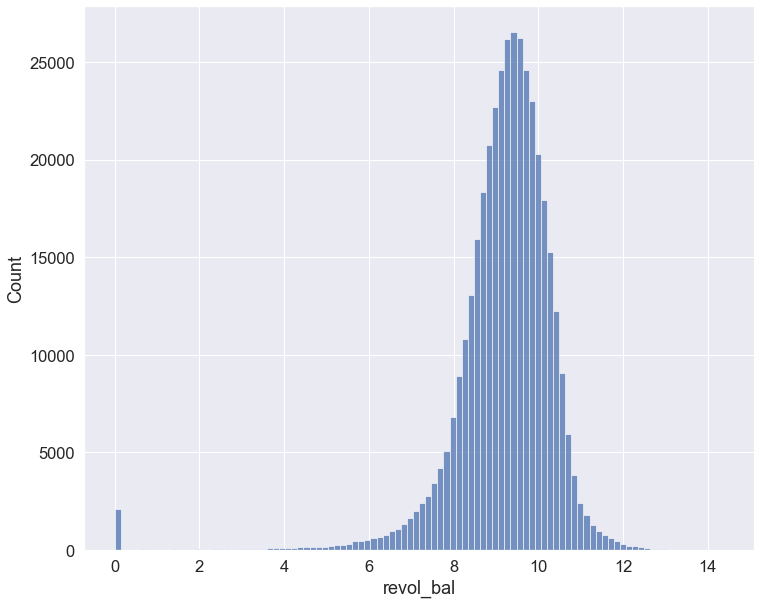

In [53]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.revol_bal),bins=100)

### revol_util

In [54]:
info[info.LoanStatNew=='revol_util'].Description

22    Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Name: Description, dtype: object

In [55]:
data1.revol_util.describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

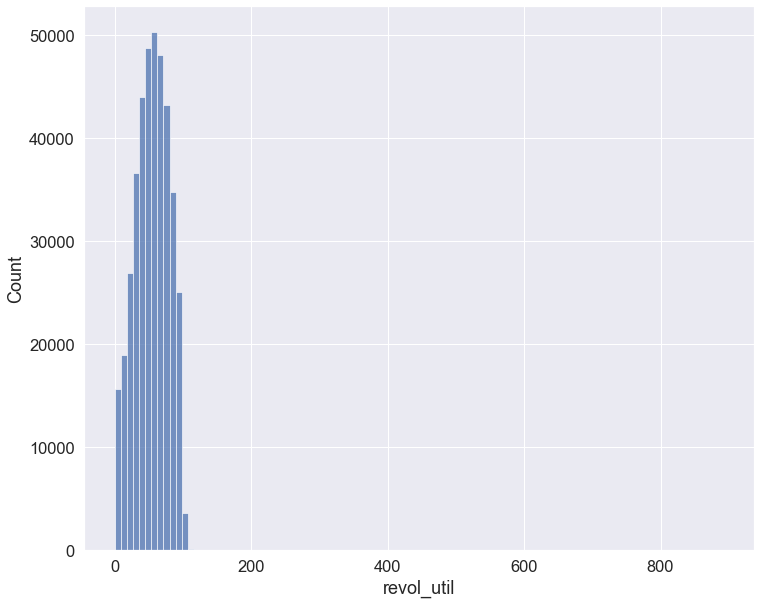

In [56]:
plt.figure(figsize=(12,10))
sns.histplot(data1.revol_util,bins=100)

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

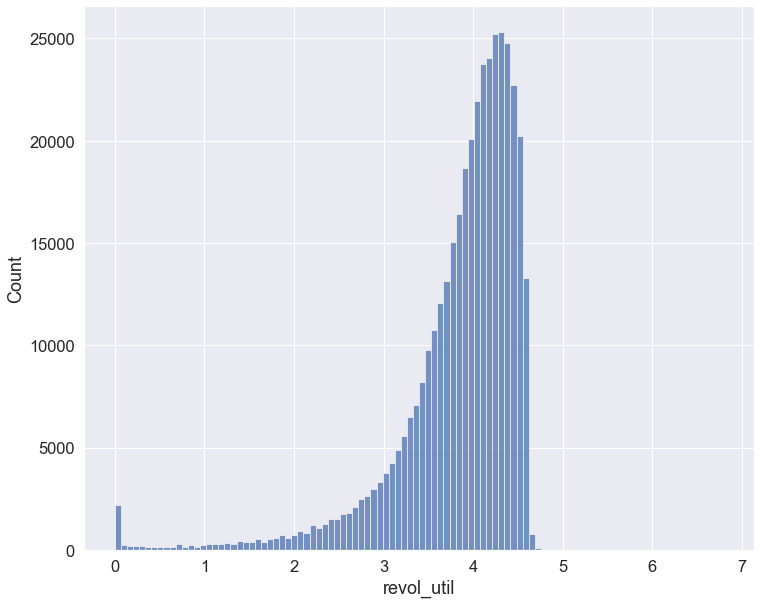

In [57]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.revol_util),bins=100)

### mort_acc

In [58]:
info[info.LoanStatNew=='mort_acc'].Description

26    Number of mortgage accounts.
Name: Description, dtype: object

In [59]:
data1.mort_acc.describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

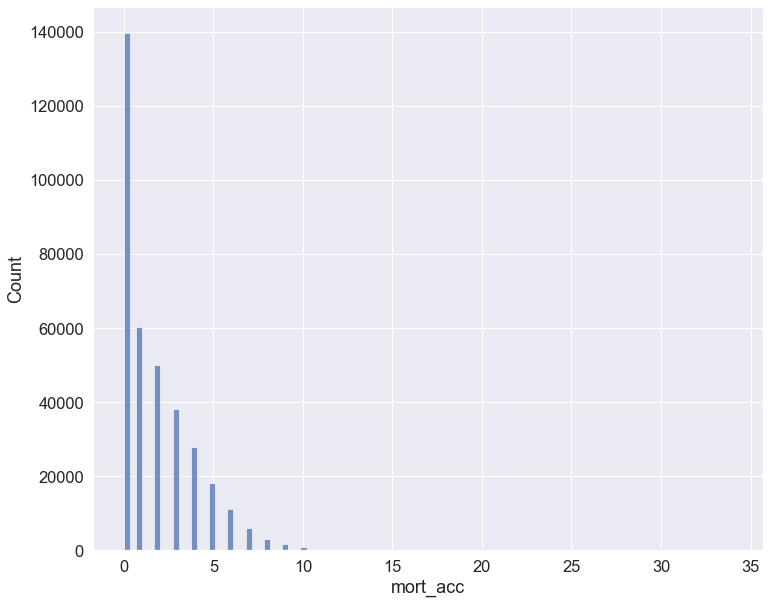

In [60]:
plt.figure(figsize=(12,10))
sns.histplot(data1.mort_acc,bins=100)

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

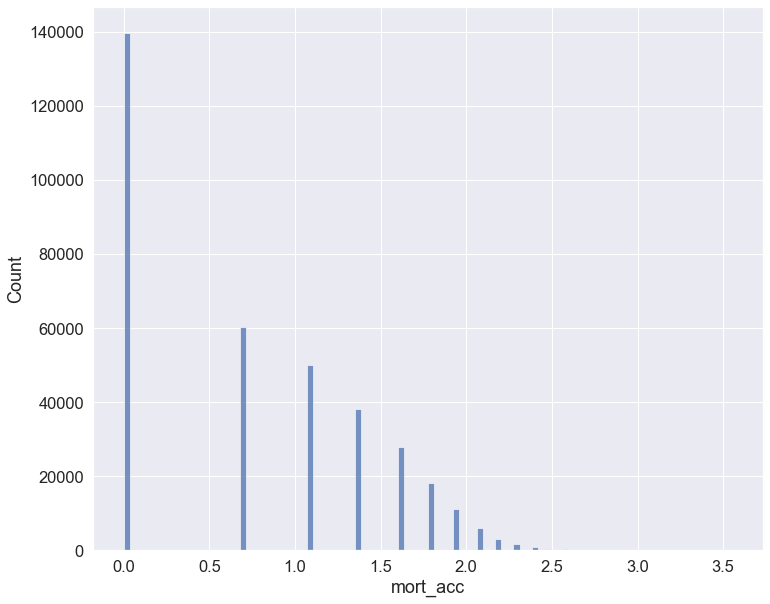

In [61]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.mort_acc),bins=100)

## Categorical Features

In [62]:
data1.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_title            373103 non-null  object
 4   emp_length           377729 non-null  object
 5   home_ownership       396030 non-null  object
 6   verification_status  396030 non-null  object
 7   issue_d              396030 non-null  object
 8   purpose              396030 non-null  object
 9   title                394275 non-null  object
 10  earliest_cr_line     396030 non-null  object
 11  initial_list_status  396030 non-null  object
 12  application_type     396030 non-null  object
 13  address              396030 non-null  object
dtypes: object(14)
memory usage: 42.3+ MB


### 1. term

In [63]:
info[info.LoanStatNew=='term'].Description

1    The number of payments on the loan. Values are in months and can be either 36 or 60.
Name: Description, dtype: object

In [64]:
data1.term.describe()

count         396030
unique             2
top        36 months
freq          302005
Name: term, dtype: object

<AxesSubplot:xlabel='term', ylabel='count'>

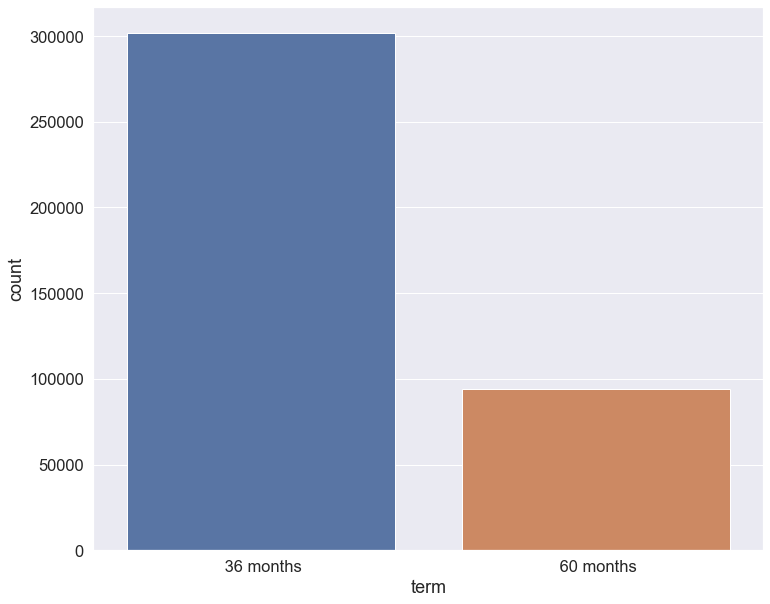

In [65]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='term')

### 2. grade

In [66]:
info[info.LoanStatNew=='grade'].Description

4    LC assigned loan grade
Name: Description, dtype: object

In [67]:
data1.grade.describe()

count     396030
unique         7
top            B
freq      116018
Name: grade, dtype: object

<AxesSubplot:xlabel='grade', ylabel='count'>

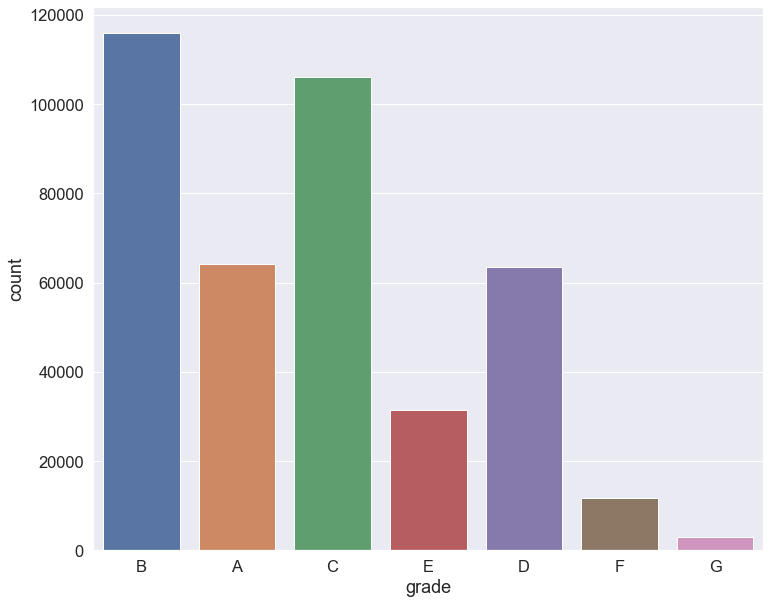

In [68]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='grade')

### 3. sub_grade

In [69]:
info[info.LoanStatNew=='sub_grade'].Description

5    LC assigned loan subgrade
Name: Description, dtype: object

In [70]:
data1.sub_grade.describe()

count     396030
unique        35
top           B3
freq       26655
Name: sub_grade, dtype: object

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

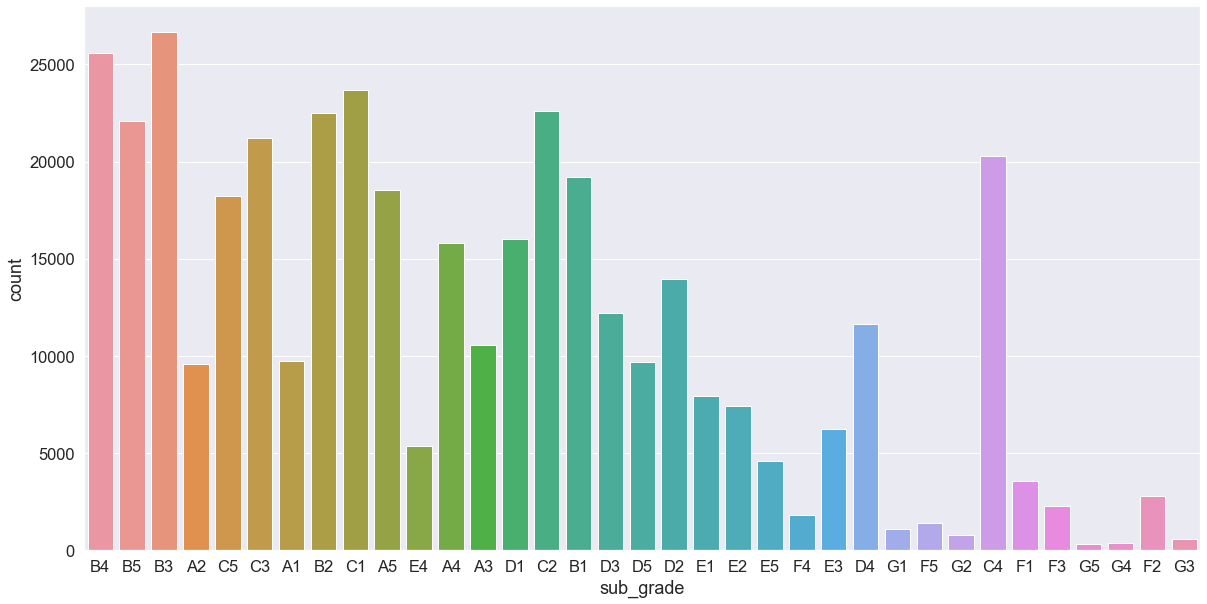

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='sub_grade')

### 4. emp_title

In [72]:
info[info.LoanStatNew=='emp_title'].Description

6    The job title supplied by the Borrower when applying for the loan.*
Name: Description, dtype: object

In [73]:
data1.emp_title.describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

In [74]:
data1.emp_title.head()

0                  Marketing
1            Credit analyst 
2               Statistician
3            Client Advocate
4    Destiny Management Inc.
Name: emp_title, dtype: object

**Too many categories.Irrelevant feature**

### 5. emp_length

In [75]:
info[info.LoanStatNew=='emp_length'].Description

7    Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
Name: Description, dtype: object

In [76]:
data1.emp_length.describe()

count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object

<AxesSubplot:xlabel='emp_length', ylabel='count'>

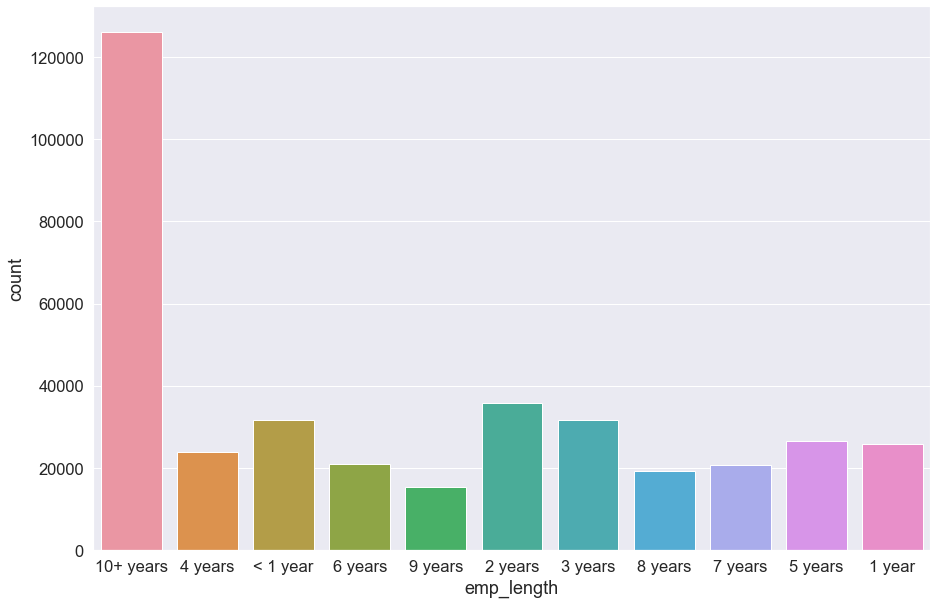

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(data=data1,x='emp_length')

### 6. home_ownership

In [78]:
info[info.LoanStatNew=='home_ownership'].Description

8    The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
Name: Description, dtype: object

In [79]:
data1.home_ownership.describe()

count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

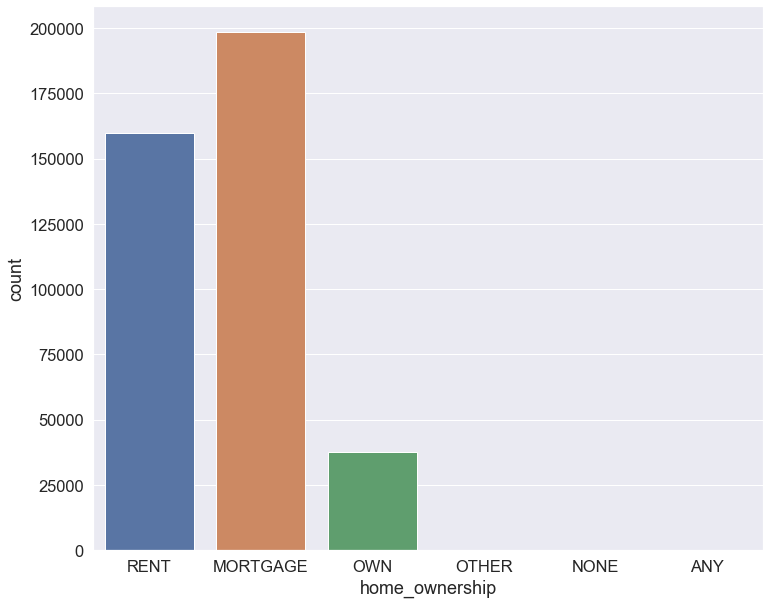

In [80]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='home_ownership')

**Need data cleaning**

### 7. verification_status

In [81]:
info[info.LoanStatNew=='verification_status'].Description

10    Indicates if income was verified by LC, not verified, or if the income source was verified
Name: Description, dtype: object

In [82]:
data1.verification_status.describe()

count       396030
unique           3
top       Verified
freq        139563
Name: verification_status, dtype: object

<AxesSubplot:xlabel='verification_status', ylabel='count'>

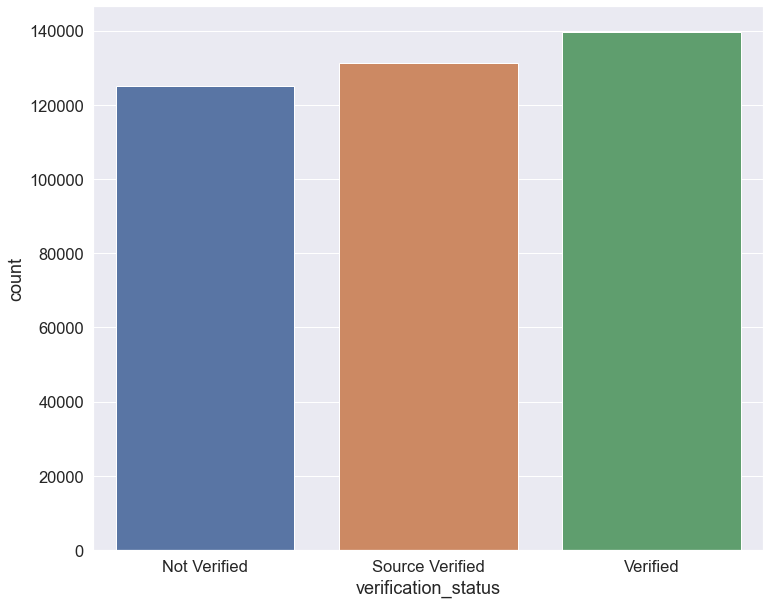

In [83]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='verification_status')

### 8. issue_d

In [84]:
info[info.LoanStatNew=='issue_d'].Description

11    The month which the loan was funded
Name: Description, dtype: object

In [85]:
data1.issue_d.describe()

count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object

**Could be feature engineered**

### 9. purpose

In [86]:
info[info.LoanStatNew=='purpose'].Description

13    A category provided by the borrower for the loan request. 
Name: Description, dtype: object

In [87]:
data1.purpose.describe()

count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object

<AxesSubplot:xlabel='count', ylabel='purpose'>

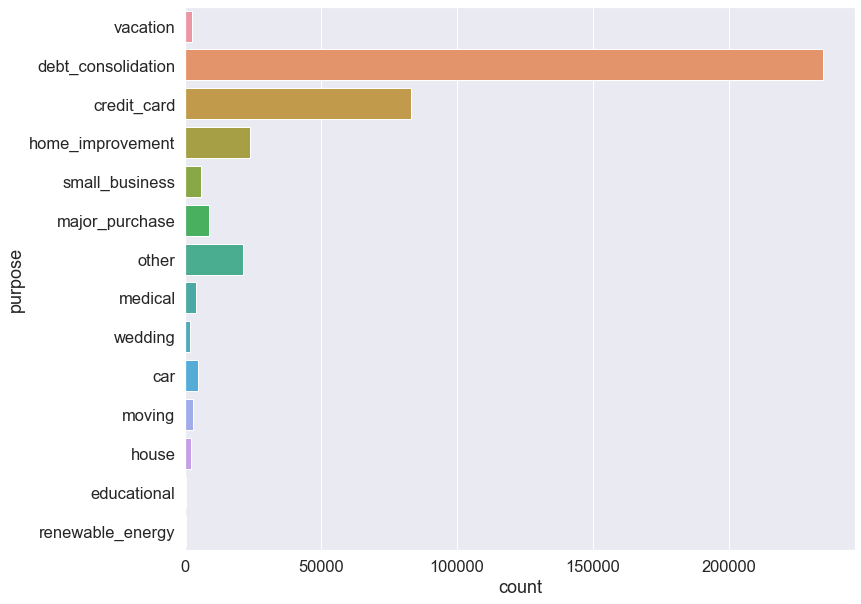

In [88]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,y='purpose')

### 10. title

In [89]:
info[info.LoanStatNew=='title'].Description

14    The loan title provided by the borrower
Name: Description, dtype: object

In [90]:
data1.title.describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

In [91]:
data1.title.head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

**Too many categories.Irrelevant feature**

### 11. earliest_cr_line

In [92]:
info[info.LoanStatNew=='earliest_cr_line'].Description

18    The month the borrower's earliest reported credit line was opened
Name: Description, dtype: object

In [93]:
data1.earliest_cr_line.describe()

count       396030
unique         684
top       Oct-2000
freq          3017
Name: earliest_cr_line, dtype: object

In [94]:
data1.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

**Could be feature engineered**

### 12. initial_list_status

In [95]:
info[info.LoanStatNew=='initial_list_status'].Description

24    The initial listing status of the loan. Possible values are – W, F
Name: Description, dtype: object

In [96]:
data1.initial_list_status.describe()

count     396030
unique         2
top            f
freq      238066
Name: initial_list_status, dtype: object

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

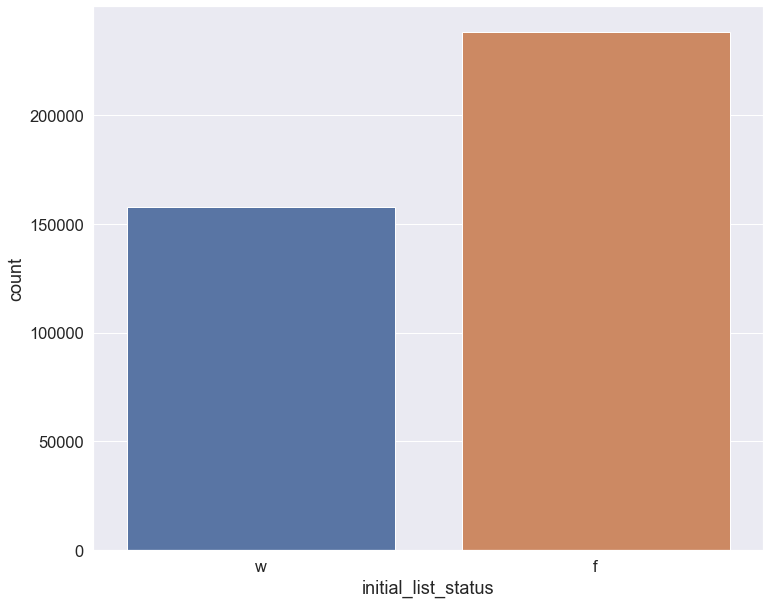

In [97]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='initial_list_status')

### 13. application_type

In [98]:
info[info.LoanStatNew=='application_type'].Description

25    Indicates whether the loan is an individual application or a joint application with two co-borrowers
Name: Description, dtype: object

In [99]:
data1.application_type.describe()

count         396030
unique             3
top       INDIVIDUAL
freq          395319
Name: application_type, dtype: object

<AxesSubplot:xlabel='application_type', ylabel='count'>

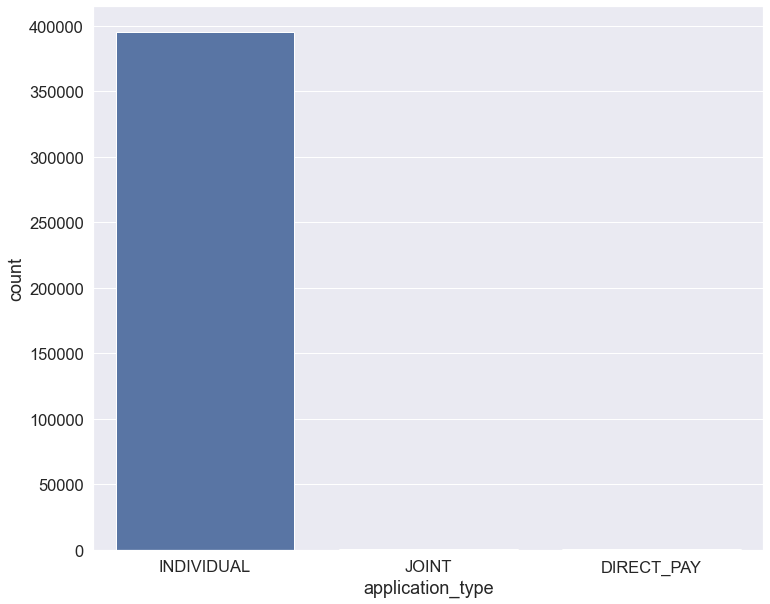

In [100]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='application_type')

In [101]:
data1.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

### 14. address

In [102]:
info[info.LoanStatNew=='address'].Description

Series([], Name: Description, dtype: object)

In [103]:
data1.address.describe()

count                        396030
unique                       393700
top       USCGC Smith\nFPO AE 70466
freq                              8
Name: address, dtype: object

**Too many categories. Irrelevant feature**

# Feature Engineering

## Features with dates

### 1. issue_d

In [104]:
info[info.LoanStatNew=='issue_d'].Description

11    The month which the loan was funded
Name: Description, dtype: object

In [105]:
data1.issue_d.describe()

count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object

### 2. earliest_cr_line

In [106]:
info[info.LoanStatNew=='earliest_cr_line'].Description

18    The month the borrower's earliest reported credit line was opened
Name: Description, dtype: object

In [107]:
data1.earliest_cr_line.describe()

count       396030
unique         684
top       Oct-2000
freq          3017
Name: earliest_cr_line, dtype: object

In [108]:
data1.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

## Converting to date-time format

In [109]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  uint8  
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [110]:
data2=data1.copy()

In [111]:
data2.earliest_cr_line=pd.to_datetime(data2.earliest_cr_line)

In [112]:
data2.issue_d=pd.to_datetime(data2.issue_d)

## Making month and year feature separate

### 1. issue_d

In [113]:
data2['issue_d_month']=data2.issue_d.apply(lambda x:x.month)
data2.issue_d_month

0          1
1          1
2          1
3         11
4          4
          ..
396025    10
396026     2
396027    10
396028     8
396029     6
Name: issue_d_month, Length: 396030, dtype: int64

In [114]:
data2['issue_d_year']=data2.issue_d.apply(lambda x:x.year)
data2.issue_d_year

0         2015
1         2015
2         2015
3         2014
4         2013
          ... 
396025    2015
396026    2015
396027    2013
396028    2012
396029    2010
Name: issue_d_year, Length: 396030, dtype: int64

### 2. earliest_cr_line

In [115]:
data2['earliest_cr_line_month']=data2.earliest_cr_line.apply(lambda x:x.month)
data2.earliest_cr_line_month

0          6
1          7
2          8
3          9
4          3
          ..
396025    11
396026     2
396027     3
396028    11
396029     9
Name: earliest_cr_line_month, Length: 396030, dtype: int64

In [116]:
data2['earliest_cr_line_year']=data2.earliest_cr_line.apply(lambda x:x.year)
data2.earliest_cr_line_year

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line_year, Length: 396030, dtype: int64

In [117]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               396030 non-null  float64       
 1   term                    396030 non-null  object        
 2   int_rate                396030 non-null  float64       
 3   installment             396030 non-null  float64       
 4   grade                   396030 non-null  object        
 5   sub_grade               396030 non-null  object        
 6   emp_title               373103 non-null  object        
 7   emp_length              377729 non-null  object        
 8   home_ownership          396030 non-null  object        
 9   annual_inc              396030 non-null  float64       
 10  verification_status     396030 non-null  object        
 11  issue_d                 396030 non-null  datetime64[ns]
 12  loan_status             396030

## Dropping original date-time features

In [118]:
data2.drop(['issue_d','earliest_cr_line'],axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  object 
 5   sub_grade               396030 non-null  object 
 6   emp_title               373103 non-null  object 
 7   emp_length              377729 non-null  object 
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  loan_status             396030 non-null  uint8  
 12  purpose                 396030 non-null  object 
 13  title                   394275 non-null  object 
 14  dti                 

## Checking if grade and subgrade are linked

### 1. grade=='A'

In [119]:
data2[data2.grade=='A'].sub_grade.value_counts()

A5    18526
A4    15789
A3    10576
A1     9729
A2     9567
Name: sub_grade, dtype: int64

### 2. grade=='B'

In [120]:
data2[data2.grade=='B'].sub_grade.value_counts()

B3    26655
B4    25601
B2    22495
B5    22085
B1    19182
Name: sub_grade, dtype: int64

### 3. grade=='C'

In [121]:
data2[data2.grade=='C'].sub_grade.value_counts()

C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
Name: sub_grade, dtype: int64

### 4. grade=='D'

In [122]:
data2[data2.grade=='D'].sub_grade.value_counts()

D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
Name: sub_grade, dtype: int64

### 5. grade=='E'

In [123]:
data2[data2.grade=='E'].sub_grade.value_counts()

E1    7917
E2    7431
E3    6207
E4    5361
E5    4572
Name: sub_grade, dtype: int64

### 6. grade=='F'

In [124]:
data2[data2.grade=='F'].sub_grade.value_counts()

F1    3536
F2    2766
F3    2286
F4    1787
F5    1397
Name: sub_grade, dtype: int64

### 7. grade=='G'

In [125]:
data2[data2.grade=='G'].sub_grade.value_counts()

G1    1058
G2     754
G3     552
G4     374
G5     316
Name: sub_grade, dtype: int64

**grade and sub_grade are related features**

## Removing grade info from sub_grade

In [126]:
data3=data2.copy()

In [127]:
data3.sub_grade=data3.sub_grade.apply(lambda x:x[1])

In [128]:
data3.sub_grade.head()

0    4
1    5
2    3
3    2
4    5
Name: sub_grade, dtype: object

## EDA of new features

### 1. issue_d_month

In [129]:
data3.issue_d_month.value_counts()

10    42130
7     39714
1     34682
11    34068
4     33223
8     32816
3     31919
5     31895
6     30140
12    29082
2     28742
9     27619
Name: issue_d_month, dtype: int64

<AxesSubplot:xlabel='issue_d_month', ylabel='count'>

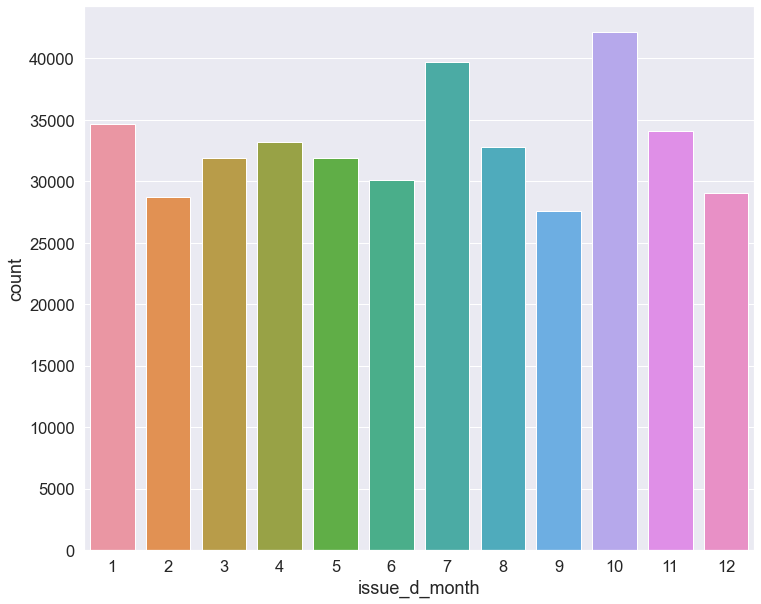

In [130]:
plt.figure(figsize=(12,10))
sns.countplot(data=data3,x='issue_d_month')

### 2. issue_d_year

In [131]:
data3.issue_d_year.value_counts()

2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: issue_d_year, dtype: int64

<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

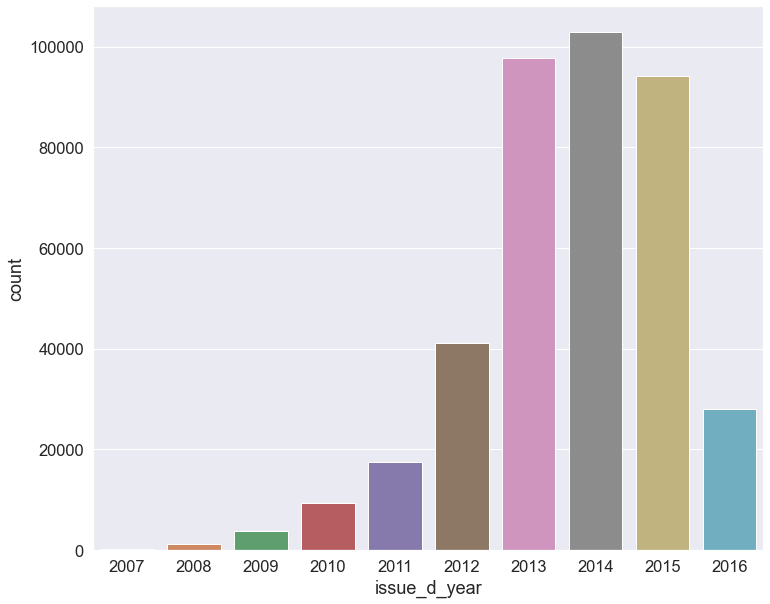

In [132]:
plt.figure(figsize=(12,10))
sns.countplot(data=data3,x='issue_d_year')

### 3. earliest_cr_line_month

In [133]:
data3.earliest_cr_line_month.value_counts()

10    38291
9     37673
8     37349
11    35583
12    33687
7     31972
3     31617
1     30694
6     30445
5     30445
4     29231
2     29043
Name: earliest_cr_line_month, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line_month', ylabel='count'>

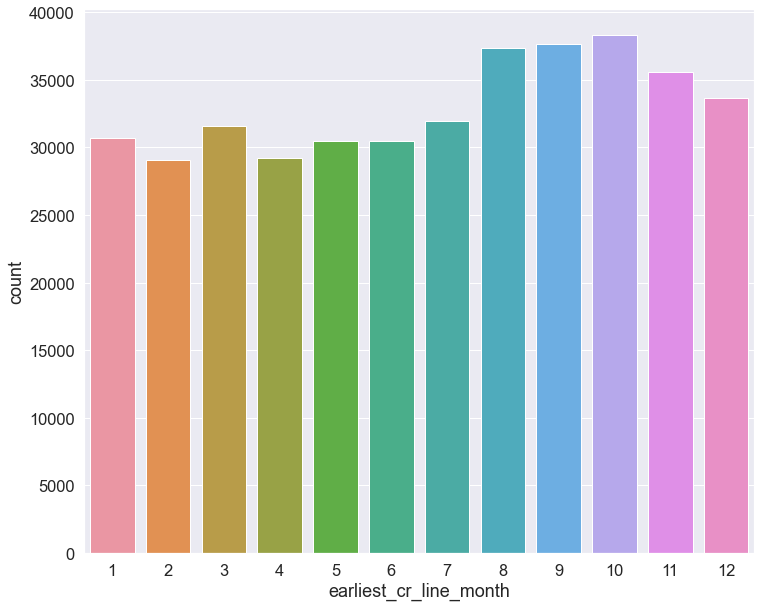

In [134]:
plt.figure(figsize=(12,10))
sns.countplot(data=data3,x='earliest_cr_line_month')

### 4. earliest_cr_line_year

In [135]:
data3.earliest_cr_line_year.value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line_year, Length: 65, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Count'>

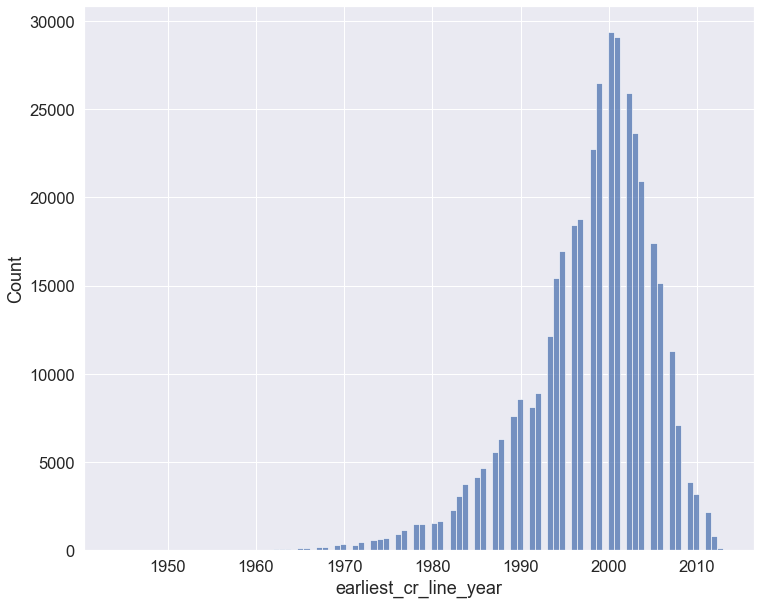

In [136]:
plt.figure(figsize=(12,10))
sns.histplot(data3.earliest_cr_line_year,bins=100)

### 5. sub_grade

In [137]:
data3.sub_grade.value_counts()

1    81077
4    80849
3    79720
2    79544
5    74840
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

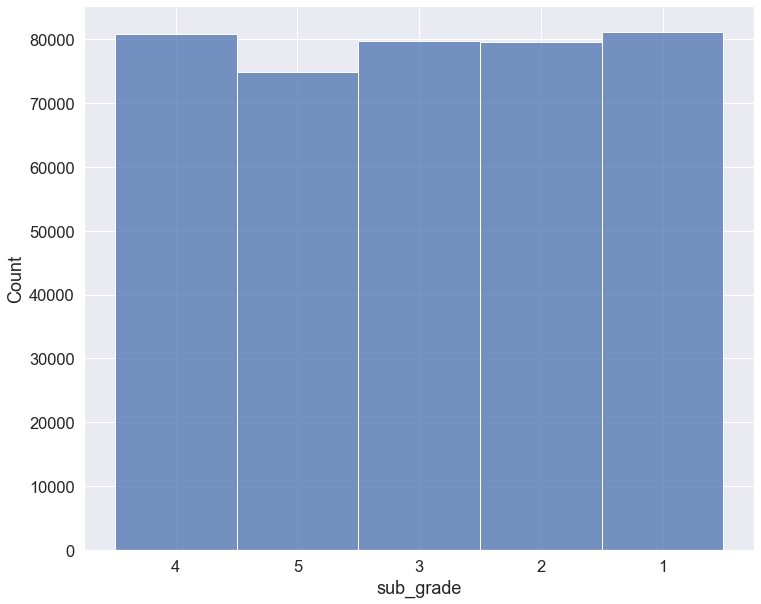

In [138]:
plt.figure(figsize=(12,10))
sns.histplot(data3.sub_grade,bins=100)

## New Correlations

In [139]:
data3.corr().loan_status.sort_values()[:-1]

int_rate                 -0.247758
revol_util               -0.082373
dti                      -0.062413
issue_d_year             -0.060502
loan_amnt                -0.059836
installment              -0.041082
earliest_cr_line_year    -0.038928
open_acc                 -0.028012
pub_rec                  -0.019933
pub_rec_bankruptcies     -0.009383
earliest_cr_line_month    0.003861
revol_bal                 0.010892
issue_d_month             0.016368
total_acc                 0.017893
annual_inc                0.053432
mort_acc                  0.073111
Name: loan_status, dtype: float64

In [140]:
correl2=pd.DataFrame(data3.corr().loan_status.sort_values()[:-1]).reset_index()

In [141]:
correl2

,index,loan_status
0,int_rate,-0.247758
1,revol_util,-0.082373
2,dti,-0.062413
3,issue_d_year,-0.060502
4,loan_amnt,-0.059836
5,installment,-0.041082
6,earliest_cr_line_year,-0.038928
7,open_acc,-0.028012
8,pub_rec,-0.019933
9,pub_rec_bankruptcies,-0.009383


<AxesSubplot:xlabel='loan_status', ylabel='index'>

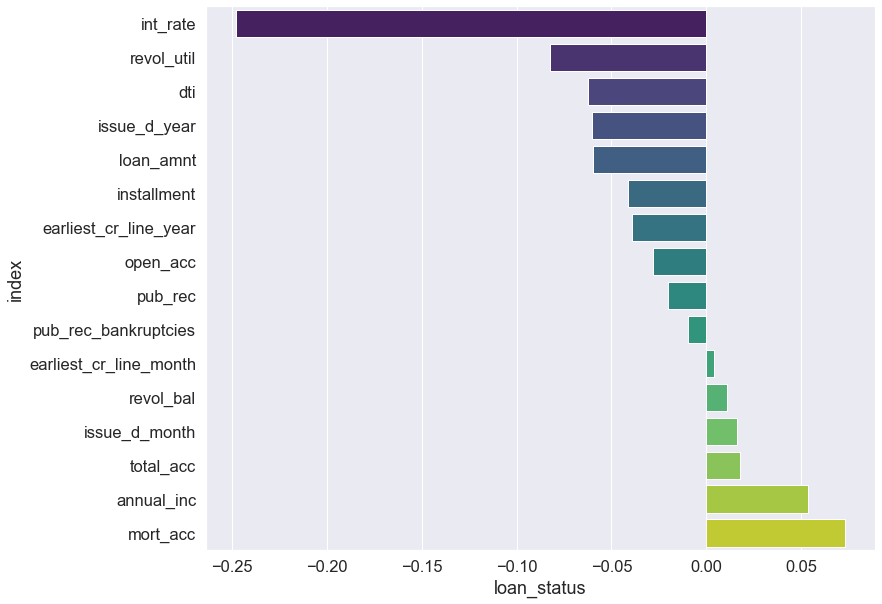

In [142]:
plt.figure(figsize=(12,10))
sns.barplot(y='index',x='loan_status',data=correl2,palette='viridis')

**Among new features, year-features are negatively correlated with loan_status. Month-features have negligible correlations**

# Feature Selection

### Categorical features: emp_title, title and address have too many unique values

In [143]:
data3.emp_title.describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

In [144]:
data3.title.describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

In [145]:
data3.address.describe()

count                        396030
unique                       393700
top       USCGC Smith\nFPO AE 70466
freq                              8
Name: address, dtype: object

### Categorical features: issue_d_month and earliest_cr_line_month have very less correlation to label

In [146]:
data3.issue_d_month.describe()

count    396030.000000
mean          6.553188
std           3.426622
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: issue_d_month, dtype: float64

In [147]:
data3.earliest_cr_line_month.describe()

count    396030.000000
mean          6.756231
std           3.435011
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: earliest_cr_line_month, dtype: float64

## Dropping features

In [148]:
data4=data3.copy()

In [149]:
data4.drop(['emp_title','title','address','issue_d_month','earliest_cr_line_month'],axis=1,inplace=True)

In [150]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  object 
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   grade                  396030 non-null  object 
 5   sub_grade              396030 non-null  object 
 6   emp_length             377729 non-null  object 
 7   home_ownership         396030 non-null  object 
 8   annual_inc             396030 non-null  float64
 9   verification_status    396030 non-null  object 
 10  loan_status            396030 non-null  uint8  
 11  purpose                396030 non-null  object 
 12  dti                    396030 non-null  float64
 13  open_acc               396030 non-null  float64
 14  pub_rec                396030 non-nu

# Data Encoding

## Remaining Categorical Features

In [151]:
data4.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_length           377729 non-null  object
 4   home_ownership       396030 non-null  object
 5   verification_status  396030 non-null  object
 6   purpose              396030 non-null  object
 7   initial_list_status  396030 non-null  object
 8   application_type     396030 non-null  object
dtypes: object(9)
memory usage: 27.2+ MB


**emp_length and home_ownership will be encoded after filling null values**

## Dummy Encoding

In [152]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  object 
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   grade                  396030 non-null  object 
 5   sub_grade              396030 non-null  object 
 6   emp_length             377729 non-null  object 
 7   home_ownership         396030 non-null  object 
 8   annual_inc             396030 non-null  float64
 9   verification_status    396030 non-null  object 
 10  loan_status            396030 non-null  uint8  
 11  purpose                396030 non-null  object 
 12  dti                    396030 non-null  float64
 13  open_acc               396030 non-null  float64
 14  pub_rec                396030 non-nu

In [153]:
data5=data4.copy()

In [154]:
data5.select_dtypes('object').drop(['emp_length','home_ownership'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   verification_status  396030 non-null  object
 4   purpose              396030 non-null  object
 5   initial_list_status  396030 non-null  object
 6   application_type     396030 non-null  object
dtypes: object(7)
memory usage: 21.2+ MB


In [155]:
data5.select_dtypes('object').drop(['emp_length','home_ownership'],axis=1)

,term,grade,sub_grade,verification_status,purpose,initial_list_status,application_type
0,36 months,B,4,Not Verified,vacation,w,INDIVIDUAL
1,36 months,B,5,Not Verified,debt_consolidation,f,INDIVIDUAL
2,36 months,B,3,Source Verified,credit_card,f,INDIVIDUAL
3,36 months,A,2,Not Verified,credit_card,f,INDIVIDUAL
4,60 months,C,5,Verified,credit_card,f,INDIVIDUAL
...,...,...,...,...,...,...,...
396025,60 months,B,4,Source Verified,debt_consolidation,w,INDIVIDUAL
396026,36 months,C,1,Source Verified,debt_consolidation,f,INDIVIDUAL
396027,36 months,B,1,Verified,debt_consolidation,f,INDIVIDUAL
396028,60 months,C,2,Verified,debt_consolidation,f,INDIVIDUAL


In [156]:
dummies=pd.get_dummies(data5.select_dtypes('object').drop(['emp_length','home_ownership'],axis=1),drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   term_ 60 months                      396030 non-null  uint8
 1   grade_B                              396030 non-null  uint8
 2   grade_C                              396030 non-null  uint8
 3   grade_D                              396030 non-null  uint8
 4   grade_E                              396030 non-null  uint8
 5   grade_F                              396030 non-null  uint8
 6   grade_G                              396030 non-null  uint8
 7   sub_grade_2                          396030 non-null  uint8
 8   sub_grade_3                          396030 non-null  uint8
 9   sub_grade_4                          396030 non-null  uint8
 10  sub_grade_5                          396030 non-null  uint8
 11  verification_status_Source Verified  39

## Removies original features

In [157]:
data5.drop(data5.select_dtypes('object').drop(['emp_length','home_ownership'],axis=1).columns.to_list(),axis=1,inplace=True)
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   int_rate               396030 non-null  float64
 2   installment            396030 non-null  float64
 3   emp_length             377729 non-null  object 
 4   home_ownership         396030 non-null  object 
 5   annual_inc             396030 non-null  float64
 6   loan_status            396030 non-null  uint8  
 7   dti                    396030 non-null  float64
 8   open_acc               396030 non-null  float64
 9   pub_rec                396030 non-null  float64
 10  revol_bal              396030 non-null  float64
 11  revol_util             395754 non-null  float64
 12  total_acc              396030 non-null  float64
 13  mort_acc               358235 non-null  float64
 14  pub_rec_bankruptcies   395495 non-nu

## Adding dummies

In [158]:
data6=data5.copy()

In [159]:
data6=pd.concat([data5,dummies],axis=1)
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   emp_length                           377729 non-null  object 
 4   home_ownership                       396030 non-null  object 
 5   annual_inc                           396030 non-null  float64
 6   loan_status                          396030 non-null  uint8  
 7   dti                                  396030 non-null  float64
 8   open_acc                             396030 non-null  float64
 9   pub_rec                              396030 non-null  float64
 10  revol_bal                            396030 non-null  float64
 11  revol_util   

# Data Cleaning

## Checking for nulls

In [160]:
data6.isnull()

,loan_amnt,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,dti,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

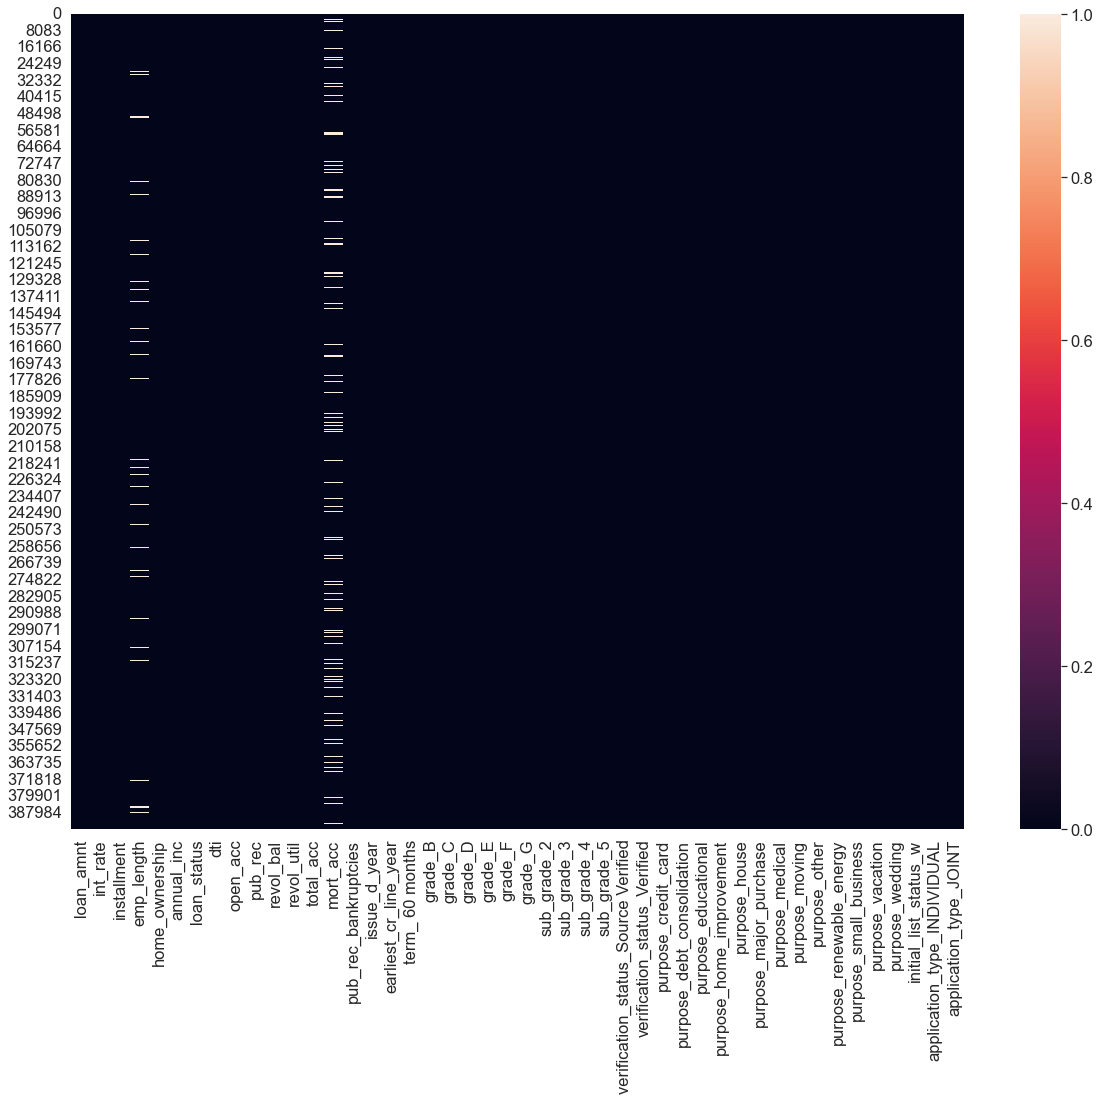

In [161]:
plt.figure(figsize=(20,15))
sns.heatmap(data6.isnull())

In [162]:
data6.isnull().sum()

loan_amnt                                  0
int_rate                                   0
installment                                0
emp_length                             18301
home_ownership                             0
annual_inc                                 0
loan_status                                0
dti                                        0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                               276
total_acc                                  0
mort_acc                               37795
pub_rec_bankruptcies                     535
issue_d_year                               0
earliest_cr_line_year                      0
term_ 60 months                            0
grade_B                                    0
grade_C                                    0
grade_D                                    0
grade_E                                    0
grade_F   

## Features with nulls

### 1. emp_length : 18301 nulls

In [163]:
info[info.LoanStatNew=='emp_length'].Description

7    Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
Name: Description, dtype: object

In [164]:
data6.emp_length.describe()

count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object

<AxesSubplot:xlabel='emp_length', ylabel='count'>

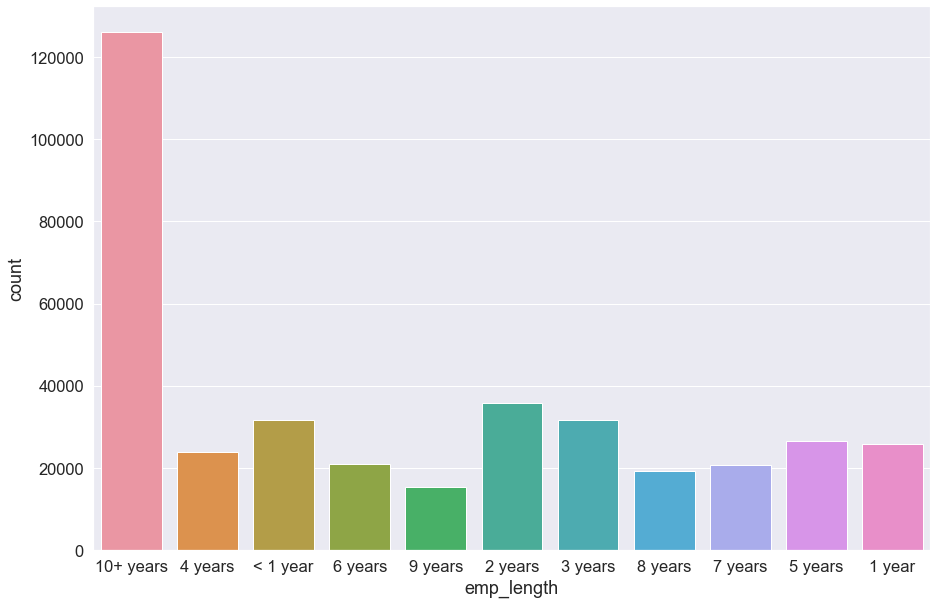

In [165]:
plt.figure(figsize=(15,10))
sns.countplot(data=data6,x='emp_length')

### 2. mort_acc : 37795 nulls

In [166]:
info[info.LoanStatNew=='mort_acc'].Description

26    Number of mortgage accounts.
Name: Description, dtype: object

In [167]:
data6.mort_acc.describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

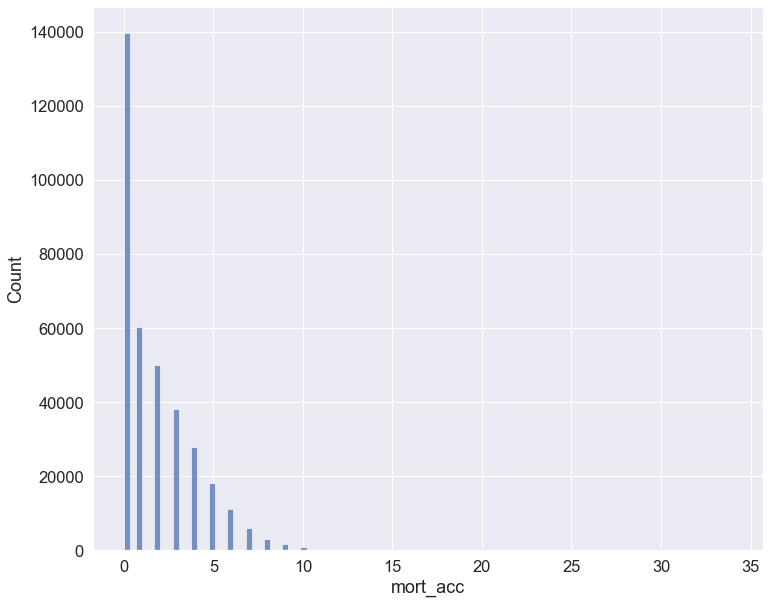

In [168]:
plt.figure(figsize=(12,10))
sns.histplot(data6.mort_acc,bins=100)

### 3. revol_util : 276 nulls

In [169]:
info[info.LoanStatNew=='revol_util'].Description

22    Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Name: Description, dtype: object

In [170]:
data6.revol_util.describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

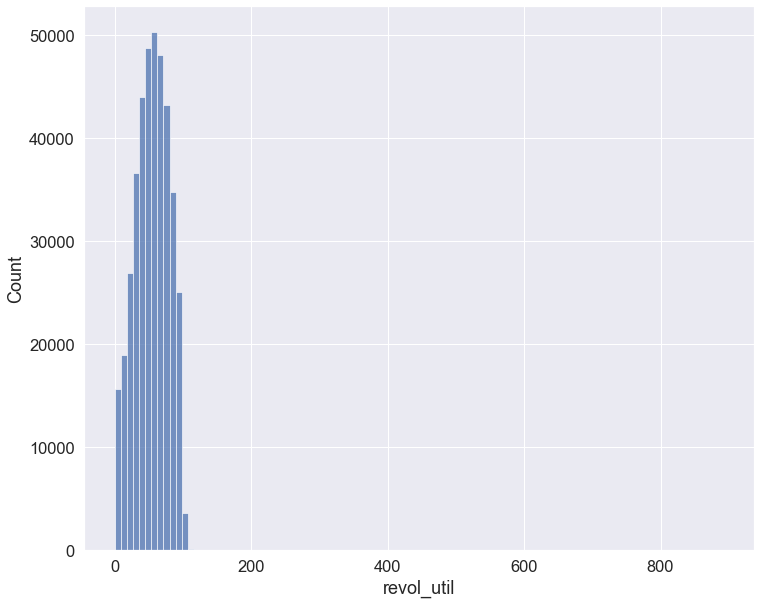

In [171]:
plt.figure(figsize=(12,10))
sns.histplot(data6.revol_util,bins=100)

### 4. pub_rec_bankruptcies : 535 nulls

In [172]:
info[info.LoanStatNew=='pub_rec_bankruptcies'].Description

27    Number of public record bankruptcies
Name: Description, dtype: object

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

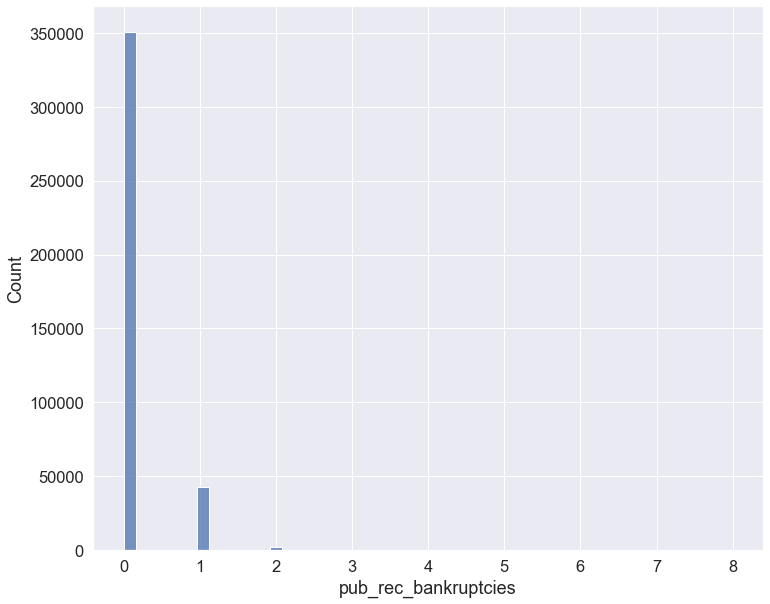

In [173]:
plt.figure(figsize=(12,10))
sns.histplot(data6.pub_rec_bankruptcies,bins=50)

In [174]:
data6.pub_rec_bankruptcies.describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

### 5. home_ownership

In [175]:
info[info.LoanStatNew=='home_ownership'].Description

8    The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
Name: Description, dtype: object

In [176]:
data6.home_ownership.describe()

count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object

In [177]:
data6.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

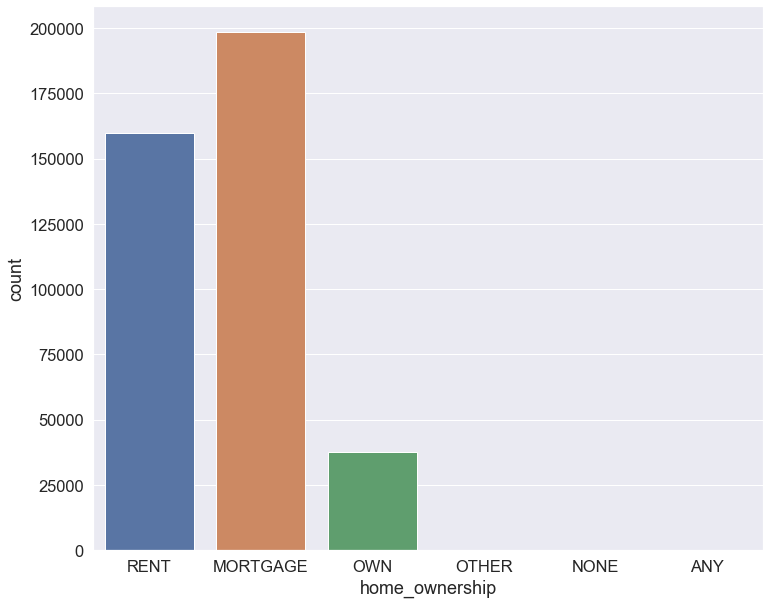

In [178]:
plt.figure(figsize=(12,10))
sns.countplot(data=data6,x='home_ownership')

## Predictors for filling null values

### Removing other features with nulls

In [179]:
fill_df=data6.drop(['emp_length','mort_acc','revol_util','pub_rec_bankruptcies','home_ownership'],axis=1)

In [180]:
fill_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'issue_d_year',
       'earliest_cr_line_year', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_2',
       'sub_grade_3', 'sub_grade_4', 'sub_grade_5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT'],
      dtype='object')

In [181]:
fill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   loan_status                          396030 non-null  uint8  
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  issue_d_year                         396030 non-null  int64  
 11  earliest_cr_l

### Scaling for KNN 

In [182]:
scaler=StandardScaler()

In [183]:
scaled_feat=scaler.fit_transform(fill_df)
scaled_feat

array([[-0.49224315, -0.49179907, -0.40829071, ...,  1.22763603,
         0.04240929, -0.03277658],
       [-0.73155115, -0.36881576, -0.66275026, ..., -0.81457368,
         0.04240929, -0.03277658],
       [ 0.17781923, -0.70422477,  0.29960938, ..., -0.81457368,
         0.04240929, -0.03277658],
       ...,
       [-1.09051314, -0.81602778, -1.07897908, ..., -0.81457368,
         0.04240929, -0.03277658],
       [ 0.82395082,  0.37355619,  0.28385522, ..., -0.81457368,
         0.04240929, -0.03277658],
       [-1.44947513, -0.00657403, -1.45125579, ..., -0.81457368,
         0.04240929, -0.03277658]])

In [184]:
scaled_fill=pd.DataFrame(scaled_feat, columns=fill_df.columns)
scaled_fill

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,-0.492243,-0.491799,-0.408291,0.694330,0.493944,0.491728,0.912646,-0.335785,0.996729,-0.034891,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,12.669375,-0.067797,1.227636,0.042409,-0.032777
1,-0.731551,-0.368816,-0.662750,-0.149311,0.493944,0.259197,1.107287,-0.335785,0.208163,0.133361,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777
2,0.177819,-0.704225,0.299609,-0.505312,0.493944,-0.254703,0.328720,-0.335785,-0.187334,0.049235,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777
3,-0.827274,-1.598649,-0.842348,-0.327774,0.493944,-0.820215,-1.033772,-0.335785,-0.503722,-1.044399,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777
4,1.227783,0.811824,0.707861,-0.311550,-2.024520,0.919608,0.328720,-0.335785,0.424414,1.479372,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492243,-0.592422,-0.855390,-0.554908,0.493944,-0.097092,-1.033772,-0.335785,-0.672818,-0.203142,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,1.227636,0.042409,-0.032777
396026,0.823951,-0.301734,1.071164,0.580763,0.493944,0.225899,-1.033772,-0.335785,1.331523,-1.465027,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777
396027,-1.090513,-0.816028,-1.078979,-0.287214,0.493944,0.010016,0.718004,-0.335785,0.818746,-0.203142,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777
396028,0.823951,0.373556,0.283855,-0.165535,0.493944,-0.083218,-0.449847,-0.335785,-0.006825,-0.455519,...,-0.103482,-0.085199,-0.237732,-0.028835,-0.120854,-0.078930,-0.067797,-0.814574,0.042409,-0.032777


In [185]:
scaled_fill.sub_grade_3

0        -0.502027
1        -0.502027
2         1.991924
3        -0.502027
4        -0.502027
            ...   
396025   -0.502027
396026   -0.502027
396027   -0.502027
396028   -0.502027
396029   -0.502027
Name: sub_grade_3, Length: 396030, dtype: float64

In [186]:
scaled_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   loan_status                          396030 non-null  float64
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  issue_d_year                         396030 non-null  float64
 11  earliest_cr_l

## Filling nulls : Using KNN regressor and classifier

In [187]:
data7=data6.copy()

### 1. emp_length

In [188]:
data7.emp_length

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

#### Non-null values

In [189]:
data7[data7.emp_length.notna()].emp_length


0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 377729, dtype: object

#### Preparing training set : rows with non-null values for emp_length

In [190]:
X_emp_length=scaled_fill[data7.emp_length.notna()]
X_emp_length.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377729 entries, 0 to 396029
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            377729 non-null  float64
 1   int_rate                             377729 non-null  float64
 2   installment                          377729 non-null  float64
 3   annual_inc                           377729 non-null  float64
 4   loan_status                          377729 non-null  float64
 5   dti                                  377729 non-null  float64
 6   open_acc                             377729 non-null  float64
 7   pub_rec                              377729 non-null  float64
 8   revol_bal                            377729 non-null  float64
 9   total_acc                            377729 non-null  float64
 10  issue_d_year                         377729 non-null  float64
 11  earliest_cr_l

In [191]:
y_emp_length=data7[data7.emp_length.notna()].emp_length
y_emp_length.head()

0    10+ years
1      4 years
2     < 1 year
3      6 years
4      9 years
Name: emp_length, dtype: object

#### Preparing prediction set : rows with null values

In [192]:
test_emp_length=scaled_fill[data7.emp_length.isna()]
test_emp_length.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18301 entries, 35 to 396015
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            18301 non-null  float64
 1   int_rate                             18301 non-null  float64
 2   installment                          18301 non-null  float64
 3   annual_inc                           18301 non-null  float64
 4   loan_status                          18301 non-null  float64
 5   dti                                  18301 non-null  float64
 6   open_acc                             18301 non-null  float64
 7   pub_rec                              18301 non-null  float64
 8   revol_bal                            18301 non-null  float64
 9   total_acc                            18301 non-null  float64
 10  issue_d_year                         18301 non-null  float64
 11  earliest_cr_line_year     

#### Three-tier Gridsearch found best parameter as 'n_neighbors': 81 (Run time taken : 12 hours)

**knnGS3.best_params_:'n_neighbors': 81**

**knnGS3.best_score_ : 0.338059825864227**

**Only 33.8 % accuracy for predicting nulls**

#### KNN Classifier

In [209]:
KnnC_1=KNeighborsClassifier(81)

In [210]:
KnnC_1.fit(X_emp_length,y_emp_length)
predict_emp_length=KnnC_1.predict(test_emp_length)
predict_emp_length

array(['10+ years', '6 years', '10+ years', ..., '10+ years', '10+ years',
       '10+ years'], dtype=object)

In [211]:
predict_emp_length.size

18301

#### Filling predicted values

In [213]:
data7.loc[data7.emp_length.isna(),'emp_length']

35        NaN
36        NaN
49        NaN
58        NaN
91        NaN
         ... 
395946    NaN
395963    NaN
395988    NaN
395999    NaN
396015    NaN
Name: emp_length, Length: 18301, dtype: object

In [214]:
data7.loc[data7.emp_length.isna(),'emp_length']=predict_emp_length

In [215]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   emp_length                           396030 non-null  object 
 4   home_ownership                       396030 non-null  object 
 5   annual_inc                           396030 non-null  float64
 6   loan_status                          396030 non-null  uint8  
 7   dti                                  396030 non-null  float64
 8   open_acc                             396030 non-null  float64
 9   pub_rec                              396030 non-null  float64
 10  revol_bal                            396030 non-null  float64
 11  revol_util   